In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
from scipy.spatial import distance
from scipy.special import softmax
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def Evaluation_matix(y_test, original_y_test,unlearned_y_test, retrained_y_test, unlearned_y_forget,
retrained_y_forget, epoch_unlearned, epoch_retrained):

    # Samples count
    N_class_test = len(retrained_y_test[0])
    N_samples_test = len(retrained_y_test)
    N_samples_forget = len(unlearned_y_forget)

    # Setting up lousy instructor
    lousy_instructor = [[random.random() for e in range(N_class_test)] for e in range(N_samples_forget)]
    softmax_lousy_instructor = list(map(lambda x: list(softmax(x)),lousy_instructor))
    print(softmax_lousy_instructor)


    # ACCURACY
    print("\n--------------ACCURACY, RECALL, F1-SCORE -----------------\n")

    print("ORIGINAL MODEL [TEST DATA]----------------------\n")

    y_true = list(map(lambda x: np.argmax(x), y_test))
    y_pred = list(map(lambda x: np.argmax(x), original_y_test))

    class_wise_acc = [0]*N_class_test
    class_wise_precision = [0]*N_class_test
    class_wise_recall = [0]*N_class_test
    class_wise_f1_score = [0] *N_class_test
    report = classification_report(y_pred, y_true, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    con_mat = confusion_matrix(y_true,y_pred)
    for i in range(N_class_test):
        class_wise_acc[i] = con_mat[i][i]/sum(con_mat[i])
        class_wise_precision[i] = report_df.iloc[i,0]
        class_wise_recall[i] = report_df.iloc[i,1]
        class_wise_f1_score[i] = report_df.iloc[i,2]

    print("Class wise Accuracy")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_acc[i]*100)+"%")
    plt.bar(range(N_class_test), [x*100 for x in class_wise_acc], color='blue', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Class wise Accuracy for original model')
    plt.show()

    print("\nClass wise Precision")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_precision[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='red', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Precision')
    plt.title('Class wise Precision for original model')
    plt.show()

    print("\nClass wise Recall")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_recall[i]))
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_precision[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='green', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Recall')
    plt.title('Class wise Recall for original model')
    plt.show()

    print("\nClass wise F1-score")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_f1_score[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='yellow', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('F1-Score')
    plt.title('Class wise F1-Score for original model')
    plt.show()


    print("\nUNLEARNED MODEL [TEST DATA]----------------------\n")

    y_true = list(map(lambda x: np.argmax(x),y_test))
    y_pred = list(map(lambda x: np.argmax(x),unlearned_y_test))

    class_wise_acc = [0]*N_class_test
    class_wise_precision = [0]*N_class_test
    class_wise_recall = [0]*N_class_test
    class_wise_f1_score = [0] *N_class_test
    report = classification_report(y_pred, y_true, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    con_mat = confusion_matrix(y_true,y_pred)
    for i in range(N_class_test):
        class_wise_acc[i] = con_mat[i][i]/sum(con_mat[i])
        class_wise_precision[i] = report_df.iloc[i,0]
        class_wise_recall[i] = report_df.iloc[i,1]
        class_wise_f1_score[i] = report_df.iloc[i,2]

    print("Class wise Accuracy for unlearned model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_acc[i]*100)+"%")
    plt.bar(range(N_class_test), [x*100 for x in class_wise_acc], color='blue', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Class wise Accuracy for unlearned model')
    plt.show()

    print("\nClass wise Accuracy for unlearned model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_precision[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='red', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Precision')
    plt.title('Class wise Precision for unlearned model')
    plt.show()

    print("\nClass wise Recall for unlearned model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_recall[i]))
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_precision[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='green', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Recall')
    plt.title('Class wise Recall for unlearned model')
    plt.show()

    print("\nClass wise F1-score for unlearned model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_f1_score[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='yellow', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('F1-Score')
    plt.title('Class wise F1-Score for unlearned model')
    plt.show()


    print("\nRetrained MODEL [TEST DATA]----------------------\n")

    y_true = list(map(lambda x: np.argmax(x),y_test))
    y_pred = list(map(lambda x: np.argmax(x),retrained_y_test))

    class_wise_acc = [0]*N_class_test
    class_wise_precision = [0]*N_class_test
    class_wise_recall = [0]*N_class_test
    class_wise_f1_score = [0] *N_class_test
    report = classification_report(y_pred, y_true, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    con_mat = confusion_matrix(y_true,y_pred)
    for i in range(N_class_test):
        class_wise_acc[i] = con_mat[i][i]/sum(con_mat[i])
        class_wise_precision[i] = report_df.iloc[i,0]
        class_wise_recall[i] = report_df.iloc[i,1]
        class_wise_f1_score[i] = report_df.iloc[i,2]

    print("Class wise Accuracy for retrained model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_acc[i]*100)+"%")
    plt.bar(range(N_class_test), [x*100 for x in class_wise_acc], color='blue', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.title('Class wise Accuracy for retrained model')
    plt.show()

    print("\nClass wise Precision for retrained model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_precision[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='red', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Precision')
    plt.title('Class wise Precision for retrained model')
    plt.show()

    print("\nClass wise Recall")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_recall[i]))
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_precision[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='green', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('Recall')
    plt.title('Class wise Recall for retrained model')
    plt.show()

    print("\nClass wise F1-score for retrained model")
    for i in range(N_class_test):
        print("class "+str(i)+" : "+str(class_wise_f1_score[i]))
    plt.bar(range(N_class_test), [x*100 for x in class_wise_precision], color='yellow', alpha=0.7)
    plt.xticks(range(N_class_test))
    plt.xlabel('Class')
    plt.ylabel('F1-Score')
    plt.title('Class wise F1-Score for retrained model')
    plt.show()


    print("\n")

    # ----------------- JS Divergence ----------------- #

    print("\n-------------- JS DIVERGENCE -----------------\n")

    sample_wise_JS_divergence = distance.jensenshannon(unlearned_y_test,retrained_y_test,axis = 1)**2
    average_JS_divergence = sum(sample_wise_JS_divergence)/N_samples_test
    print("Unlearned vs retrained (TEST SET) : " + str(average_JS_divergence)+"\n")

    sample_wise_JS_divergence = distance.jensenshannon(unlearned_y_forget,retrained_y_forget,axis = 1)**2
    average_JS_divergence = sum(sample_wise_JS_divergence)/N_samples_forget
    print("Unlearned vs retrained (FORGET SET): " + str(average_JS_divergence)+"\n")

    # ----------------- Activation Distance --------------- #
    print("\n-------------- ACTIVATION DISTANCE -----------------\n")
    total_dist = 0
    for sample in range(N_samples_test):
        total_dist += distance.euclidean(unlearned_y_test[sample],retrained_y_test[sample])
    average_activation_distance = total_dist/N_samples_test
    print("Unlearned vs retrained (TEST SET): " + str(average_activation_distance)+"\n")


    # ----------------- ZRF Score ------------------------- #
    print("\n-------------- ZRF SCORE -----------------\n")

    zrf_JS_divergence = distance.jensenshannon(softmax_lousy_instructor,unlearned_y_forget,axis =1)**2
    zrf_score = 1 - sum(zrf_JS_divergence)/N_samples_forget
    print("ZRF SCORE (FORGET SET): " + str(zrf_score)+"\n")


    # ----------------- Anamnesis Index (AIN) ------------------- #
    print("\n-------------- ANAMNESIS INDEX (AIN) -----------------\n")
    print("AIN : "+str(epoch_unlearned/epoch_retrained))


In [ ]:
import os
import subprocess

import pandas as pd
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.models import resnet18
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from skimage import io
from time import time

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


class AgeResNet(nn.Module):
    def __init__(self, num_bins):
        super(AgeResNet, self).__init__()
        # Load a pretrained resnet model from torchvision.models in Pytorch
        self.model = resnet18(pretrained=True)

        # Change the output layer to output
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_bins)

    def forward(self, x):
        return self.model(x)

In [ ]:
class UTKAgeDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform = None):
        # self.data = data
        self.data = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        img_name = os.path.join(self.images_folder,
                                self.data.iloc[index, 0])
        image = io.imread(img_name).astype(np.float16)
        age_bin = self.data.iloc[index, 5]
        if self.transform is not None:
          image = self.transform(image)
        if image.shape[0] == 1:
          image = torch.stack([image,image,image]).reshape((3, 32, 32))
        return (torch.tensor(image).to(torch.float), torch.tensor(age_bin).to(torch.long))

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/Dataset/utkface_dataset.csv')
train_df, valid_df = train_test_split(data, test_size=0.2, random_state=42)

valid_df.to_csv('/content/drive/MyDrive/Dataset/valid_dataset.csv', index=False)

In [ ]:
!mkdir utkface
!tar -xvzf /content/drive/MyDrive/Dataset/utkface.tar.gz -C utkface/

In [ ]:
def get_dataset(batch_size):
    '''Get the dataset.'''
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((64,64)),
        # transforms.Normalize((0.1307,), (0.3081,)),
    ])
    retain_ds = UTKAgeDataset(csv_path="/content/drive/MyDrive/Dataset/retain_set.csv", images_folder="/content/utkface", transform = transform)
    forget_ds = UTKAgeDataset(csv_path="/content/drive/MyDrive/Dataset/forget_set.csv", images_folder="/content/utkface", transform = transform)
    val_ds = UTKAgeDataset(csv_path="/content/drive/MyDrive/Dataset/valid_dataset.csv", images_folder="/content/utkface", transform = transform)

    retain_loader = DataLoader(retain_ds, batch_size=batch_size, shuffle=False)
    forget_loader = DataLoader(forget_ds, batch_size=batch_size, shuffle=False)
    validation_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    return retain_loader, forget_loader, validation_loader


retain_loader, forget_loader, validation_loader = get_dataset(batch_size=5)


In [ ]:
retain_y = pd.read_csv('/content/drive/MyDrive/Dataset/retain_set.csv')['age_bin'].to_list()
forget_y = pd.read_csv('/content/drive/MyDrive/Dataset/forget_set.csv')['age_bin'].to_list()
valid_y = pd.read_csv('/content/drive/MyDrive/Dataset/valid_dataset.csv')['age_bin'].to_list()

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [ ]:
from tqdm.auto import tqdm

def return_preds(eval_set, model):
    """Eval on the dev or test set - calculate loss and accuracy"""
    model.eval()
    preds = []
    with torch.no_grad():
        for input, target in tqdm(eval_set, desc="Dev/Test batch"):
            # bs = target.size(0)
            data, target = input.to(torch.float32).to(DEVICE), target.to(DEVICE)
            logits = model(data)

            preds.extend(logits.tolist())

    return preds

In [ ]:
def model_preds(model):
    forget_preds = return_preds(forget_loader, model)
    forget_preds = softmax(np.array(forget_preds))
    forget_preds = list(forget_preds)

    retain_preds = return_preds(retain_loader, model)
    retain_preds = softmax(np.array(retain_preds))
    retain_preds = list(retain_preds)

    test_preds = return_preds(validation_loader, model)
    test_preds = softmax(np.array(test_preds))
    test_preds = list(test_preds)

    return test_preds, retain_preds, forget_preds

# Original Model

In [ ]:
NUM_CHECKPOINTS = 10

original = AgeResNet(10)
original.to(DEVICE)
original.load_state_dict(torch.load('/content/drive/MyDrive/Dataset/age_pred_weights.pt'))

In [ ]:
test_orig_preds, retain_orig_preds, forget_orig_preds = model_preds(original)

<All keys matched successfully>

# Unlearned

In [ ]:
unlearned = AgeResNet(10)
unlearned.to(DEVICE)
unlearned.load_state_dict(torch.load('/content/drive/MyDrive/outs/unlearned_checkpoint_0.pth'))

<All keys matched successfully>

In [ ]:
test_unlearned_preds, retain_unlearned_preds, forget_unlearned_preds = model_preds(unlearned)

Dev/Test batch:   0%|          | 0/342 [00:00<?, ?it/s]

Dev/Test batch:   0%|          | 0/4475 [00:00<?, ?it/s]

Dev/Test batch:   0%|          | 0/964 [00:00<?, ?it/s]

# Retrained

In [ ]:
retrained = AgeResNet(10)
retrained.to(DEVICE)
retrained.load_state_dict(torch.load('/content/drive/MyDrive/Dataset/retrain_weights.pth'))

test_retrained_preds, retain_retrained_preds, forget_retrained_preds = model_preds(retrained)

# Evaluation

In [ ]:
len(valid_y), len(test_orig_preds), len(test_unlearned_preds), len(test_retrained_preds)

(4817, 4817, 4817, 4817)

In [ ]:
len(forget_unlearned_preds) , len(forget_retrained_preds)

(1710, 1710)

In [ ]:
valid_y_np = np.array(valid_y)
valid_y = np.zeros((valid_y_np.size, valid_y_np.max() + 1))
valid_y[np.arange(valid_y_np.size), valid_y_np] = 1
valid_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[[0.07414317177675045, 0.08289037508506145, 0.06120165712891982, 0.1644670717215786, 0.13341019458026, 0.0817422856224589, 0.07810192175218293, 0.15683123706231908, 0.06896723968891369, 0.09824484558155518], [0.16016598683424274, 0.07909631328991718, 0.1415179481818196, 0.06922029578252517, 0.09151714344159764, 0.07562008218205456, 0.09428103858855667, 0.07819753045858067, 0.12428186180156352, 0.0861017994391422], [0.09611272373398978, 0.0705658876720619, 0.12097851817710685, 0.10737316307857121, 0.13673089484593814, 0.09120903589554823, 0.12684834819553223, 0.06752696935425417, 0.06598125831327066, 0.11667320073372678], [0.09835506942319429, 0.0724318015318452, 0.06907299756211079, 0.10538635796691481, 0.08631372549929078, 0.08969565600269018, 0.14060716504278611, 0.12615638624459927, 0.15111899646071297, 0.06086184426585563], [0.12482451819865523, 0.0764834261565323, 0.10041805604021818, 0.0765447495060192, 0.0846478199931073, 0.08076081064412485, 0.1202705371596938, 0.12441687607364

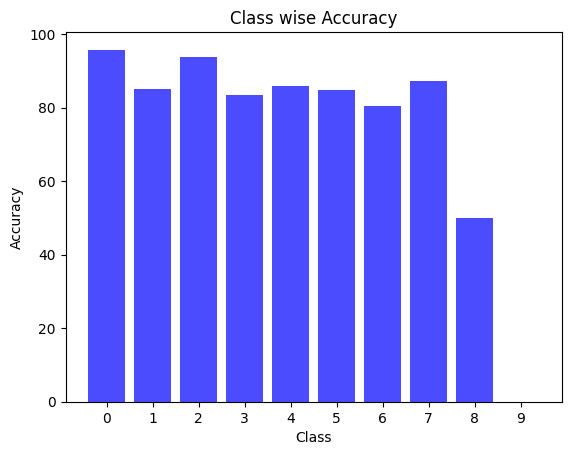


Class wise Precision
class 0 : 0.9573590096286108
class 1 : 0.850909090909091
class 2 : 0.9383209594517419
class 3 : 0.8345642540620384
class 4 : 0.8584558823529411
class 5 : 0.8466257668711656
class 6 : 0.8040540540540541
class 7 : 0.8735632183908046
class 8 : 0.5
class 9 : 0.0


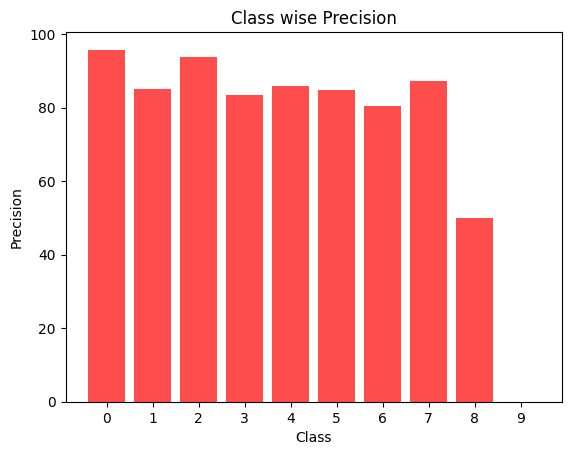


Class wise Recall
class 0 : 0.9456521739130435
class 1 : 0.9052224371373307
class 2 : 0.8987964989059081
class 3 : 0.8705701078582434
class 4 : 0.8745318352059925
class 5 : 0.8625
class 6 : 0.8686131386861314
class 7 : 0.8172043010752689
class 8 : 1.0
class 9 : 0.0
class 0 : 0.9573590096286108
class 1 : 0.850909090909091
class 2 : 0.9383209594517419
class 3 : 0.8345642540620384
class 4 : 0.8584558823529411
class 5 : 0.8466257668711656
class 6 : 0.8040540540540541
class 7 : 0.8735632183908046
class 8 : 0.5
class 9 : 0.0


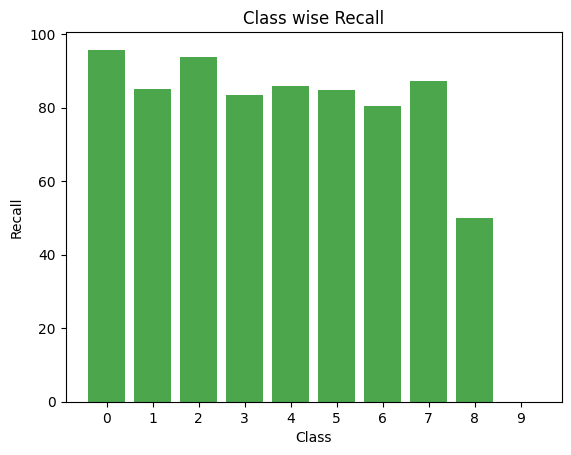


Class wise F1-score
class 0 : 0.9514695830485305
class 1 : 0.8772258669165887
class 2 : 0.918133556859458
class 3 : 0.8521870286576168
class 4 : 0.8664192949907236
class 5 : 0.8544891640866874
class 6 : 0.8350877192982457
class 7 : 0.8444444444444446
class 8 : 0.6666666666666666
class 9 : 0.0


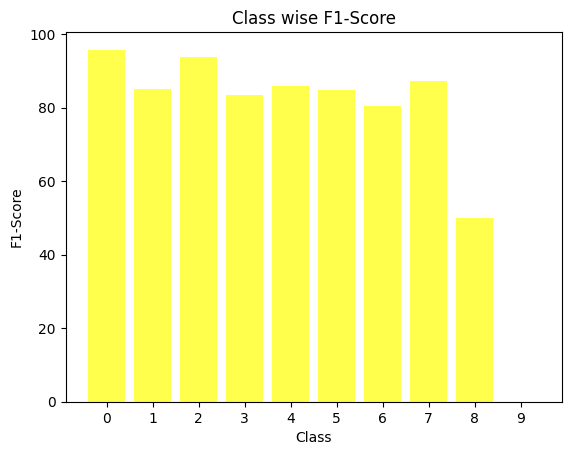


UNLEARNED MODEL [TEST DATA]----------------------

Class wise Accuracy
class 0 : 92.29711141678129%
class 1 : 34.909090909090914%
class 2 : 58.53797829811537%
class 3 : 49.77843426883309%
class 4 : 26.838235294117645%
class 5 : 12.269938650306749%
class 6 : 5.405405405405405%
class 7 : 29.88505747126437%
class 8 : 0.0%
class 9 : 0.0%


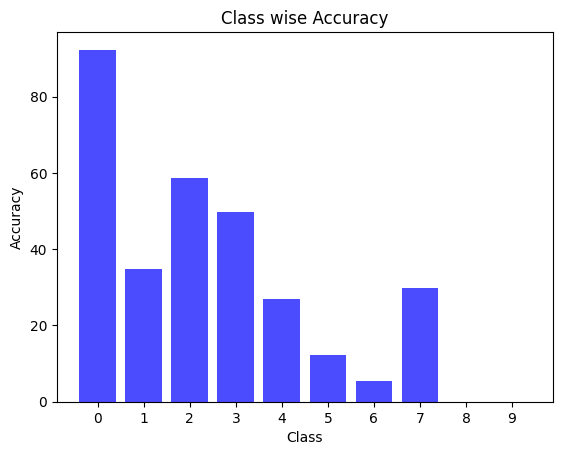


Class wise Precision
class 0 : 0.922971114167813
class 1 : 0.3490909090909091
class 2 : 0.5853797829811537
class 3 : 0.4977843426883309
class 4 : 0.26838235294117646
class 5 : 0.12269938650306748
class 6 : 0.05405405405405406
class 7 : 0.2988505747126437
class 8 : 0.0
class 9 : 0.0


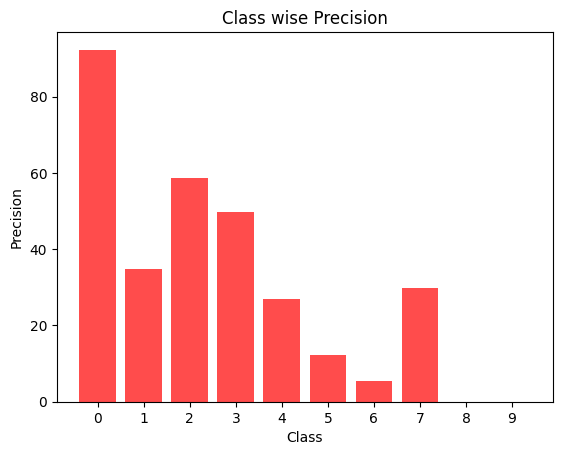


Class wise Recall
class 0 : 0.5735042735042735
class 1 : 0.4314606741573034
class 2 : 0.6212121212121212
class 3 : 0.3459958932238193
class 4 : 0.3772609819121447
class 5 : 0.3508771929824561
class 6 : 0.3076923076923077
class 7 : 0.5098039215686274
class 8 : 0.0
class 9 : 0.0
class 0 : 0.922971114167813
class 1 : 0.3490909090909091
class 2 : 0.5853797829811537
class 3 : 0.4977843426883309
class 4 : 0.26838235294117646
class 5 : 0.12269938650306748
class 6 : 0.05405405405405406
class 7 : 0.2988505747126437
class 8 : 0.0
class 9 : 0.0


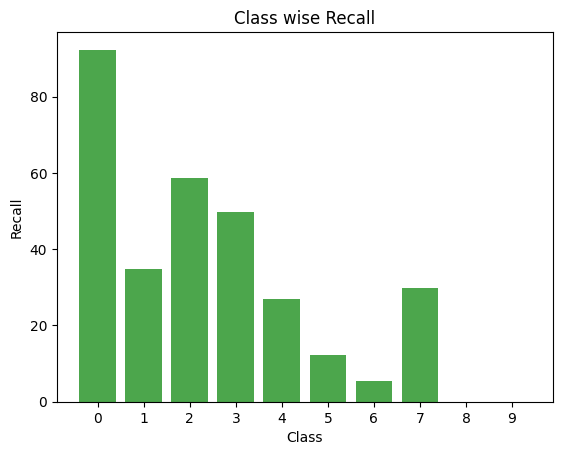


Class wise F1-score
class 0 : 0.7074327886136004
class 1 : 0.385929648241206
class 2 : 0.6027638929726552
class 3 : 0.4082374318594791
class 4 : 0.31364124597207305
class 5 : 0.1818181818181818
class 6 : 0.09195402298850575
class 7 : 0.37681159420289856
class 8 : 0.0
class 9 : 0.0


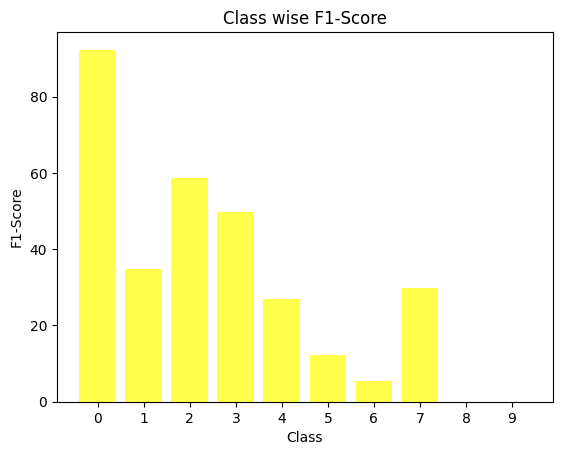


Retrained MODEL [TEST DATA]----------------------

Class wise Accuracy
class 0 : 92.29711141678129%
class 1 : 34.909090909090914%
class 2 : 58.53797829811537%
class 3 : 49.77843426883309%
class 4 : 26.838235294117645%
class 5 : 12.269938650306749%
class 6 : 5.405405405405405%
class 7 : 29.88505747126437%
class 8 : 0.0%
class 9 : 0.0%


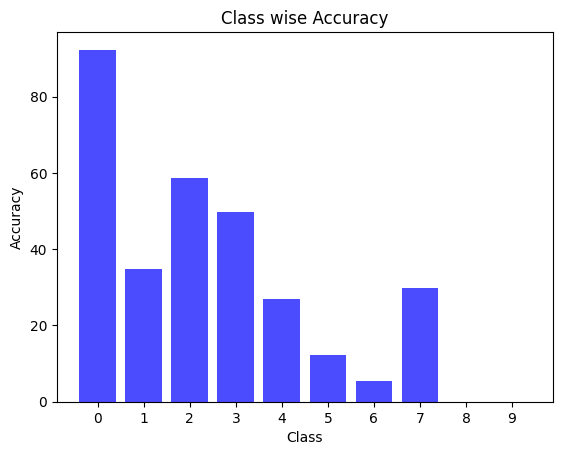


Class wise Precision
class 0 : 0.922971114167813
class 1 : 0.3490909090909091
class 2 : 0.5853797829811537
class 3 : 0.4977843426883309
class 4 : 0.26838235294117646
class 5 : 0.12269938650306748
class 6 : 0.05405405405405406
class 7 : 0.2988505747126437
class 8 : 0.0
class 9 : 0.0


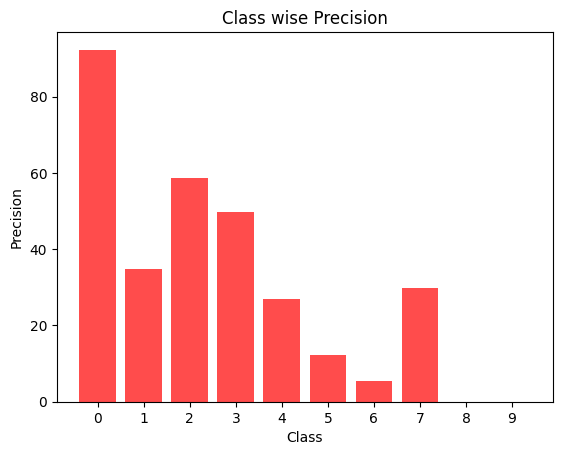


Class wise Recall
class 0 : 0.5735042735042735
class 1 : 0.4314606741573034
class 2 : 0.6212121212121212
class 3 : 0.3459958932238193
class 4 : 0.3772609819121447
class 5 : 0.3508771929824561
class 6 : 0.3076923076923077
class 7 : 0.5098039215686274
class 8 : 0.0
class 9 : 0.0
class 0 : 0.922971114167813
class 1 : 0.3490909090909091
class 2 : 0.5853797829811537
class 3 : 0.4977843426883309
class 4 : 0.26838235294117646
class 5 : 0.12269938650306748
class 6 : 0.05405405405405406
class 7 : 0.2988505747126437
class 8 : 0.0
class 9 : 0.0


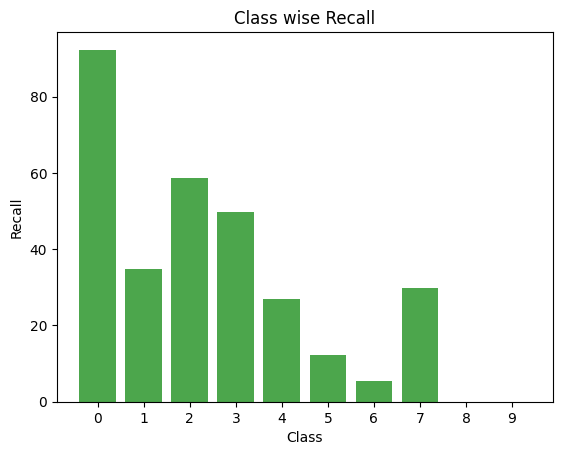


Class wise F1-score
class 0 : 0.7074327886136004
class 1 : 0.385929648241206
class 2 : 0.6027638929726552
class 3 : 0.4082374318594791
class 4 : 0.31364124597207305
class 5 : 0.1818181818181818
class 6 : 0.09195402298850575
class 7 : 0.37681159420289856
class 8 : 0.0
class 9 : 0.0


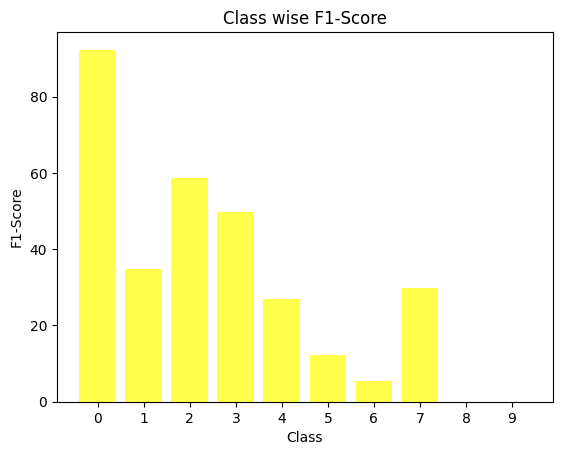




-------------- JS DIVERGENCE -----------------

Unlearned vs retrained (TEST SET) : 0.0

Unlearned vs retrained (FORGET SET): 0.0


-------------- ACTIVATION DISTANCE -----------------

Unlearned vs retrained (TEST SET): 0.0


-------------- ZRF SCORE -----------------

ZRF SCORE (FORGET SET): 0.5416037598234282


-------------- ANAMNESIS INDEX (AIN) -----------------

AIN : 1.5


In [ ]:
# test_retrained_preds = test_unlearned_preds
# forget_retrained_preds = forget_unlearned_preds

Evaluation_matix(valid_y, test_orig_preds, test_unlearned_preds, test_retrained_preds, forget_unlearned_preds,
                     forget_retrained_preds, epoch_unlearned=30, epoch_retrained=20)